# PP3: Pandas

## Section 1: Getting and knowing your data

### Step 1. Import the necessary libraries

In [2507]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

In [2508]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|')
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [2509]:
users = df.set_index('user_id')


### Step 4. See the first 25 entries

In [2510]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [2511]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [2512]:
print(f'length of df: {len(users)}')
print(f'total number of observations: {users.shape[0]* users.shape[1]}')

length of df: 943
total number of observations: 3772


### Step 7. What is the number of columns in the dataset?

In [2513]:
users.shape[1] # (df.shape[1] + 1) if additionally counting 'user_id' values

4

### Step 8. Print the name of all the columns.

In [2514]:
print(*users.columns)

age gender occupation zip_code


### Step 9. How is the dataset indexed?

In [2515]:
users.index.name

'user_id'

### Step 10. What is the data type of each column?

In [2516]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [2517]:
users['occupation']

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object

### Step 12. How many different occupations are in this dataset?

In [2518]:
len(users['occupation'].unique())

21

### Step 13. What is the most frequent occupation?

In [2519]:
users['occupation'].value_counts().index[0]

'student'

### Step 14. Summarize the DataFrame.

In [2520]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


### Step 15. Summarize all the columns

In [2521]:
df.describe(include='all')


,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


### Step 16. Summarize only the occupation column

In [2522]:
df['occupation'].describe()


count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

### Step 17. What is the mean age of users?

In [2523]:
users['age'].mean()

34.05196182396607

### Step 18. What is the age with least occurrence?

In [2524]:
users['age'].value_counts().index[-1]


73

## Section 2: Filtering and Sorting

### Step 1. Import the necessary libraries

In [2525]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv). 

### Step 3. Assign it to a variable called euro12.

In [2526]:
euro12 = pd.read_csv(
    'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### Step 4. Select only the Goal column.

In [2527]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?

In [2528]:
len(euro12['Team'].unique())

16

### Step 6. What is the number of columns in the dataset?

In [2529]:
len(euro12.columns) - 1 # not counting index

34

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [2530]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]

### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [2531]:
discipline.sort_values(['Red Cards', 'Yellow Cards'],ascending=[False, False])

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [2532]:
discipline['Yellow Cards'].mean()

7.4375

### Step 10. Filter teams that scored more than 6 goals

In [2533]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [2534]:
euro12[euro12['Team'].str.startswith('G')]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [2535]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13. Select all columns except the last 3.

In [2536]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [2537]:
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Shooting Accuracy']]

#second option more clear
euro12.set_index('Team').loc[['England', 'Italy', 'Russia'], ['Shooting Accuracy']]


,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%
Russia,22.5%


## Section 3: Grouping

### Step 1. Import the necessary libraries

In [2538]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [2539]:
drinks = pd.read_csv(
    'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [2540]:
drinks.groupby(['continent'])['beer_servings'].mean().sort_values().index[-1]

'EU'

### Step 5. For each continent print the statistics for wine consumption.

In [2541]:
drinks.groupby(['continent'])['wine_servings'].describe()


,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [2542]:
drinks.groupby(['continent']).mean()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [2543]:
drinks.groupby(['continent']).median()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [2544]:
drinks.groupby(['continent'])['total_litres_of_pure_alcohol'].agg(['mean', 'min', 'max'])


,mean,min,max
continent,,,
AF,3.007547,0.0,9.1
AS,2.170455,0.0,11.5
EU,8.617778,0.0,14.4
OC,3.381250,0.0,10.4
SA,6.308333,3.8,8.3


## Section 4: Apply

### Step 1. Import the necessary libraries

In [2545]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [2546]:
crime = pd.read_csv(
    'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv')
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [2547]:
crime.tail()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
50,2010,309330219,10363873,1251248,9112625,14772,85593,369089,781844,2168457,6204601,739565
51,2011,311587816,10258774,1206031,9052743,14661,84175,354772,752423,2185140,6151095,716508
52,2012,313873685,10219059,1217067,9001992,14866,85141,355051,762009,2109932,6168874,723186
53,2013,316497531,9850445,1199684,8650761,14319,82109,345095,726575,1931835,6018632,700294
54,2014,318857056,9475816,1197987,8277829,14249,84041,325802,741291,1729806,5858496,689527


### Step 4. What is the type of the columns?

In [2548]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [2549]:
crime['Year'] = pd.to_datetime(crime['Year'], format="%Y")
crime.head()


,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 6. Set the Year column as the index of the dataframe

In [2550]:
crime = crime.set_index('Year')

### Step 7. Delete the Total column

In [2551]:
crime = crime.drop('Total', axis=1)
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [2552]:
# crime.groupby(crime.str[:3]).agg({'Population': 'mean'}, 'sum')
pop_data = crime['Population'].copy()
crime = crime.resample('10AS').sum()
crime['Population'] = pop_data
crime


,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,203235298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,225349264,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,248709873,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,281421906,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,309330219,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### Step 9. What is the most dangerous decade to live in the US?

In [2553]:
(crime['Violent'] / crime['Population']).sort_values().index[-1]


Timestamp('1990-01-01 00:00:00')

## Section 5: Merge

### Step 1. Import the necessary libraries

In [2554]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the following raw data

In [2555]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [2556]:
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)

### Step 4. Join the two dataframes along rows and assign all_data

In [2557]:
all_data = pd.merge(data1, data2, how='outer')
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [2558]:
all_data_col = pd.concat([data1, data2], axis=1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### Step 6. Print data3

In [2559]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Step 7. Merge all_data and data3 along the subject_id value

In [2560]:
pd.merge(all_data, data3, on='subject_id').set_index('subject_id')

,first_name,last_name,test_id
subject_id,,,
1,Alex,Anderson,51
2,Amy,Ackerman,15
3,Allen,Ali,15
4,Alice,Aoni,61
4,Billy,Bonder,61
5,Ayoung,Atiches,16
5,Brian,Black,16
7,Bryce,Brice,14
8,Betty,Btisan,15


### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [2561]:
pd.merge(data1, data2, on='subject_id').set_index('subject_id')


,first_name_x,last_name_x,first_name_y,last_name_y
subject_id,,,,
4,Alice,Aoni,Billy,Bonder
5,Ayoung,Atiches,Brian,Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [2562]:
pd.merge(data1, data2, on=['subject_id', 'first_name', 'last_name'])

,subject_id,first_name,last_name


## Section 6: Stats

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [2563]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [2564]:
import pandas as pd
from datetime import date

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [2565]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', 
    delimiter='\s+', parse_dates=[['Yr', 'Mo', 'Dy']])
data = data.rename(columns={'Yr_Mo_Dy': 'date'})
data = data.set_index('date')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it[ns].

In [2566]:
def change_year(d):
    if d.year >= 2000:
        d -= pd.DateOffset(years=100)
    
    return d


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [2567]:
data.index = data.index.to_series().map(change_year)
data


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [2568]:
nan_counts = [data[col].isna().sum() for col in data]
pd.DataFrame(data=[nan_counts], columns=data.columns)


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,6,3,2,5,2,0,3,2,3,1,0,4


### Step 7. Compute how many non-missing values there are in total.

In [2569]:
data.isna().sum().sum()

31

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [2570]:
data.mean().mean()

10.227982360836938

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [2571]:
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
loc_stats

C:\Users\noahm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [2572]:
day_stats = pd.DataFrame()
day_stats['min'] = data.apply(lambda x: min(x), axis=1)
day_stats['max'] = data.apply(lambda x: max(x), axis=1)
day_stats['mean'] = data.apply(lambda x: x.mean(), axis=1)
day_stats['std'] = data.apply(lambda x: x.std(), axis=1)

day_stats.head()


,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [2573]:
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.

In [2574]:
data.resample('AS').mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-01-01,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-01-01,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-01-01,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-01-01,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-01-01,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-01-01,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-01-01,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-01-01,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Step 13. Downsample the record to a monthly frequency for each location.

In [2575]:
data.resample('MS').mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-01,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-01,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-01,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-01,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-01,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-01,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### Step 14. Downsample the record to a weekly frequency for each location.

In [2576]:
data.resample('W').mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [2577]:
weekly_data = data.iloc[1:365:7, :]

weekly_results = pd.DataFrame()
weekly_results['min'] = weekly_data.apply(lambda x: min(x), axis=1)
weekly_results['max'] = weekly_data.apply(lambda x: max(x), axis=1)
weekly_results['mean'] = weekly_data.apply(lambda x: x.mean(), axis=1)
weekly_results['std'] = weekly_data.apply(lambda x: x.std(), axis=1)

weekly_results.head()


,min,max,mean,std
date,,,,
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-09,4.75,15.37,9.897500,2.905954
1961-01-16,4.71,16.42,10.164167,3.521277
1961-01-23,9.96,20.58,14.034167,3.208592
1961-01-30,7.92,19.25,12.490833,3.513766


## Section 7: Visualization

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [2578]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [2579]:
titanic = pd.read_csv(
    'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [2580]:
titanic = titanic.set_index('PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

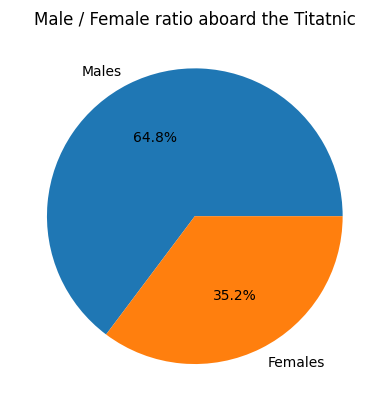

In [2581]:
fig1, ax1 = plt.subplots()
males = titanic[titanic['Sex'] == 'male']
females = titanic[titanic['Sex'] == 'female']
ax1.pie([len(males)/len(titanic)*100, len(females)/len(titanic)*100],
        labels=['Males', 'Females'], autopct='%1.1f%%', radius=1)
plt.title('Male / Female ratio aboard the Titatnic')
plt.show()



### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

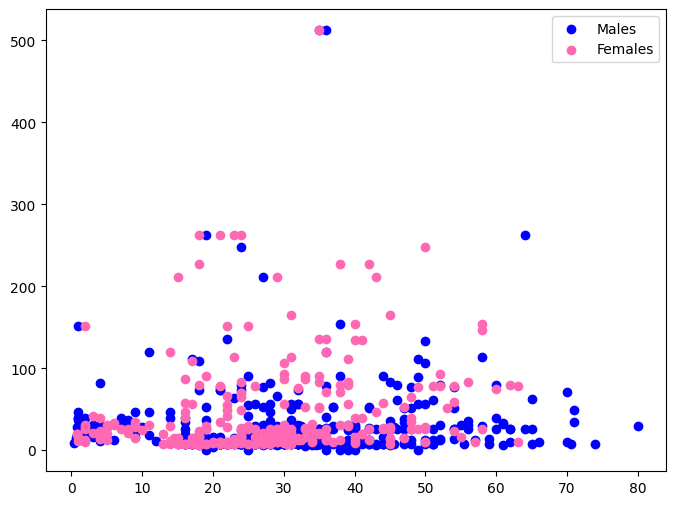

In [2582]:
from cProfile import label


plt.figure(figsize=(8, 6))


plt.scatter(males['Age'], males['Fare'], color = 'blue')
plt.scatter(females['Age'], females['Fare'], color='hotpink')

plt.legend(['Males', 'Females'])
plt.show()

### Step 7. How many people survived?

In [2583]:
titanic['Survived'].sum()

342

### Step 8. Create a histogram with the Fare payed

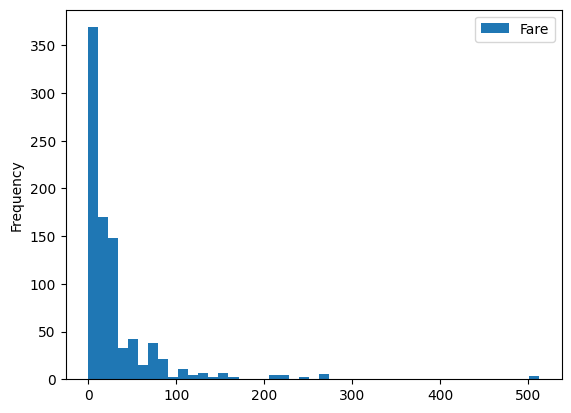

In [2584]:
titanic.plot.hist(y='Fare', bins=45)
plt.show()

## Section 8: Creating Series and DataFrames

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [2585]:
import pandas as pd

### Step 2. Create a data dictionary that looks like the DataFrame below

In [2586]:
data_dict = {
    "evolution": ['Ivysaur', 'Charmeleon', 'Wartortle', 'Metapod'],
    "hp": [45, 39, 44, 45],
    "name": ['Bulbasaur', 'Charmander', 'Squirtle', 'Caterpie'],
    "pokedex": ['yes', 'no', 'yes', 'no'],
    "type": ['grass', 'fire', 'water', 'bug']
}


### Step 3. Assign it to a variable called pokemon

In [2587]:
pokemon = pd.DataFrame(data_dict)
pokemon

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartortle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [2588]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution', 'pokedex']]
pokemon


,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### Step 5. Add another column called place, and insert what you have in mind.

In [2589]:
pokemon['place'] = ['Field', 'Hell', 'Ocean', 'Forest']
pokemon

C:\Users\noahm\AppData\Local\Temp\ipykernel_16092\2433916937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['place'] = ['Field', 'Hell', 'Ocean', 'Forest']


,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,Field
1,Charmander,fire,39,Charmeleon,no,Hell
2,Squirtle,water,44,Wartortle,yes,Ocean
3,Caterpie,bug,45,Metapod,no,Forest


### Step 6. Present the type of each column

In [2590]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

## Section: 9 Time Series

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [2591]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2592]:
apple = pd.read_csv(
    'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [2593]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [2594]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [2595]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [2596]:
apple[apple.index.duplicated()]


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [2597]:
apple = apple.sort_index()
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [2598]:
apple = apple.resample('BM').asfreq()
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44


### Step 10.  What is the difference in days between the first day and the oldest

In [2599]:
(apple.index[-1] - apple.index[0]).days

12265

### Step 11.  How many months in the data we have?

In [2600]:
apple.index.size

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

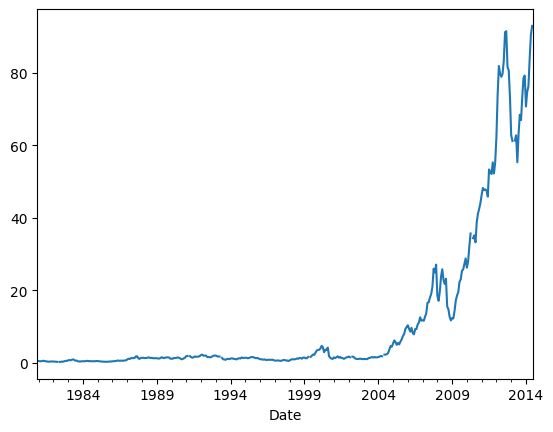

In [2601]:
apple['Adj Close'].plot()
plt.show()

## Section 10: Deleting

### Introduction:

This exercise is a adaptation from the UCI Wine dataset.
The only pupose is to practice deleting data with pandas.

### Step 1. Import the necessary libraries

In [2602]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). 

### Step 3. Assign it to a variable called wine

In [2603]:
wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [2604]:
wine = wine.drop(columns=[0, 3, 6, 8, 10, 12, 13])


### Step 5. Assign the columns as below:

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [2605]:
wine = wine.set_axis(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium',
                     'flavanoids', 'proanthocyanins', 'hue'], axis=1)
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05
2,13.16,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04


### Step 6. Set the values of the first 3 rows from alcohol as NaN

In [2606]:
wine.loc[0:2, 'alcohol'] = np.nan
wine


,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127,3.06,2.29,1.04
1,NaN,1.78,11.2,100,2.76,1.28,1.05
2,NaN,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95,0.61,1.06,0.64
174,13.40,3.91,23.0,102,0.75,1.41,0.70
175,13.27,4.28,20.0,120,0.69,1.35,0.59
176,13.17,2.59,20.0,120,0.68,1.46,0.60


### Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

In [2607]:
wine.loc[2:3, 'magnesium'] = np.nan
wine


,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,18.6,NaN,3.24,2.81,1.03
3,14.37,1.95,16.8,NaN,3.49,2.18,0.86
4,13.24,2.59,21.0,118.0,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [2608]:
wine['alcohol'] = wine['alcohol'].fillna(10)
wine['magnesium'] = wine['magnesium'].fillna(100)
wine


,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,13.24,2.59,21.0,118.0,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 9. Count the number of missing values

In [2609]:
wine.isna().sum().sum()

0

### Step 10.  Create an array of 10 random numbers up until 10

In [2610]:
rand_arr = np.random.randint(10, size=10)
rand_arr


array([8, 5, 6, 5, 4, 3, 7, 3, 4, 2])

### Step 11.  Use random numbers you generated as an index and assign NaN value to each of cell.

In [2611]:
# ???

### Step 12.  How many missing values do we have?

In [2612]:
# df.isna().sum().sum()

### Step 13. Delete the rows that contain missing values

In [2613]:
# df = df.dropna()

### Step 14. Print only the non-null values in alcohol

In [2614]:
# df[df.notnull()]

### Step 15.  Reset the index, so it starts with 0 again

In [2615]:
#df.reset_index(0)
